In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
movies = pd.read_csv('/Users/katerinacapouskova/Desktop/DSI-SF-4-katerinaC/Projects/Capstone/Movies/ml-latest/movies_new.csv')

In [98]:
movies.head()

,Unnamed: 0,movieId,ratings_count,ratings_mean,title,genres,Year,title_list,COMEDY,DRAMA,DOCUMENTARY,HORROR,THRILLER,WESTERN,ROMANCE
0,0,1,63469,3.889300,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,"['Toy', 'Story']",1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,25045,3.229527,Jumanji (1995),Adventure|Children|Fantasy,1995.0,['Jumanji'],0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3,15381,3.178142,Grumpier Old Men (1995),Comedy|Romance,1995.0,"['Grumpier', 'Old', 'Men']",1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,4,2961,2.879433,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,"['Waiting', 'to', 'Exhale']",1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4,5,15023,3.080410,Father of the Bride Part II (1995),Comedy,1995.0,"['Father', 'of', 'the', 'Bride', 'Part', 'II']",1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
movies.shape

(32573, 15)

In [4]:
movies = movies.dropna().reset_index()

In [107]:
movies.shape

(27622, 15)

In [7]:
import patsy
formula  =  'DRAMA ~ ratings_count + ratings_mean + Year -1'
y, X     =  patsy.dmatrices(formula, data=movies, return_type="dataframe")

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xn = ss.fit_transform(X)
y = np.ravel(y)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
#K-neighbors classifier with GridsearchCv
params = {
    'n_neighbors':range(1,20),
    'weights':['uniform','distance']
}

knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, params, cv=4, verbose=1)

results = knn_gs.fit(Xn, y)

Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    2.4s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:   10.5s finished


In [10]:
from sklearn.cross_validation import cross_val_score


scores = cross_val_score(knn_gs, Xn, y, cv=5)
print scores
print "Cross-validated scores mean:", sum(scores)/len(scores)


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    2.6s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    9.3s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    8.8s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.9s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    7.7s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    2.0s
[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    9.6s finished


Fitting 4 folds for each of 38 candidates, totalling 152 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    1.9s


[ 0.62570136  0.57574661  0.51846488  0.54217958  0.56335988]
Cross-validated scores mean: 0.565090461696


[Parallel(n_jobs=1)]: Done 152 out of 152 | elapsed:    7.6s finished


## Natural Language Processing

#### Try it first on romance and horror:

In [11]:
rom_hor = movies[(movies["HORROR"] == 1) | (movies["ROMANCE"] == 1)]


In [12]:
horror = movies[movies['HORROR'] == 1]

In [13]:
horror.title_list.to_csv('horror.csv')

In [14]:
horror.title.to_csv('horror_two.txt')

In [15]:
romance = movies[movies['ROMANCE'] == 1]

In [16]:
romance.title.to_csv('romance.txt')

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
count_vec = CountVectorizer(binary=True, ngram_range=(1, 2))
X_horror = count_vec.fit_transform(horror['title_list'])

In [19]:
horror_words = pd.DataFrame(X_horror.todense(), columns=count_vec.get_feature_names())

In [20]:
horror_words.head()

,100,100 bloody,100 feet,100 ghost,1000,1000 corpses,11,11 11,12,12 days,...,zombies on,zombies the,zombietown,zombieworld,zone,zone of,zone the,zoo,zoombies,zotz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
count_vec = CountVectorizer(binary=True, ngram_range=(1, 2))
X_romance = count_vec.fit_transform(romance['title_list'])
romance_words = pd.DataFrame(X_romance.todense(), columns=count_vec.get_feature_names())

In [22]:
romance_words.head()

,000,000 bc,000 leagues,01,10,10 000,10 days,10 items,10 rules,10 things,...,zo,zombie,zombie honeymoon,zombies,zoo,zoo in,zorro,zorro the,zus,zus zo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
"""
Masked wordcloud
================
Using a mask you can generate wordclouds in arbitrary shapes.
"""

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

d = path.dirname("/Users/katerinacapouskova/Desktop/")

# Read the whole text.
text = open(path.join(d, 'horror_two.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
punnisher_mask = np.array(Image.open(path.join(d, "punnisher.jpg")))

stopwords = list(STOPWORDS)
stopwords.append("I I") 
#stopwords.add('The') #, 'of', 'A', '2', 'and', 'to', 'in', 'part']


wc = WordCloud(background_color="white", max_words=2000, mask=punnisher_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "horror.png"))

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.imshow(punnisher_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

IOError: [Errno 2] No such file or directory: '/Users/katerinacapouskova/Desktop/horror_two.txt'

In [ ]:
print stopwords

In [ ]:
"""
Masked wordcloud
================
Using a mask you can generate wordclouds in arbitrary shapes.
"""

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

d = path.dirname("/Users/katerinacapouskova/Desktop/")

# Read the whole text.
text = open(path.join(d, 'romance.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
eiffel_mask = np.array(Image.open(path.join(d, "eiffel.jpg")))

stopwords = list(STOPWORDS)
#stopwords.append("I I") 
#stopwords.add('The') #, 'of', 'A', '2', 'and', 'to', 'in', 'part']


wc = WordCloud(background_color="white", max_words=2000, mask=eiffel_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "romance.png"))

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.imshow(eiffel_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [ ]:
western = movies[movies['WESTERN'] == 1]

In [ ]:
western.title.to_csv('western.txt')

In [ ]:
"""
Masked wordcloud
================
Using a mask you can generate wordclouds in arbitrary shapes.
"""

from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

d = path.dirname("/Users/katerinacapouskova/Desktop/")

# Read the whole text.
text = open(path.join(d, 'western.txt')).read()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
eiffel_mask = np.array(Image.open(path.join(d, "thegood.jpg")))

stopwords = list(STOPWORDS)
#stopwords.append("I I") 
#stopwords.add('The') #, 'of', 'A', '2', 'and', 'to', 'in', 'part']


wc = WordCloud(background_color="white", max_words=2000, mask=eiffel_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "western.png"))

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.imshow(eiffel_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [24]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27622 entries, 0 to 32572
Data columns (total 15 columns):
Unnamed: 0       27622 non-null int64
movieId          27622 non-null int64
ratings_count    27622 non-null int64
ratings_mean     27622 non-null float64
title            27622 non-null object
genres           27622 non-null object
Year             27622 non-null float64
title_list       27622 non-null object
COMEDY           27622 non-null float64
DRAMA            27622 non-null float64
DOCUMENTARY      27622 non-null float64
HORROR           27622 non-null float64
THRILLER         27622 non-null float64
WESTERN          27622 non-null float64
ROMANCE          27622 non-null float64
dtypes: float64(9), int64(3), object(3)
memory usage: 3.4+ MB


In [ ]:
try:
    for i in movies['title']:
        if 'Django' in i:
            print i
        else:
            pass
except:
    float


In [25]:
movies_list = list(movies.title)

In [26]:
print movies_list

['Toy Story (1995)', 'Jumanji (1995)', 'Grumpier Old Men (1995)', 'Waiting to Exhale (1995)', 'Father of the Bride Part II (1995)', 'Heat (1995)', 'Sabrina (1995)', 'Tom and Huck (1995)', 'Sudden Death (1995)', 'GoldenEye (1995)', 'American President, The (1995)', 'Dracula: Dead and Loving It (1995)', 'Balto (1995)', 'Nixon (1995)', 'Cutthroat Island (1995)', 'Casino (1995)', 'Sense and Sensibility (1995)', 'Four Rooms (1995)', 'Ace Ventura: When Nature Calls (1995)', 'Money Train (1995)', 'Get Shorty (1995)', 'Copycat (1995)', 'Assassins (1995)', 'Powder (1995)', 'Leaving Las Vegas (1995)', 'Othello (1995)', 'Now and Then (1995)', 'Persuasion (1995)', 'Dangerous Minds (1995)', 'Wings of Courage (1995)', 'Babe (1995)', 'Carrington (1995)', 'Dead Man Walking (1995)', 'Across the Sea of Time (1995)', 'It Takes Two (1995)', 'Clueless (1995)', 'Cry, the Beloved Country (1995)', 'Richard III (1995)', 'Dead Presidents (1995)', 'Restoration (1995)', 'Mortal Kombat (1995)', 'To Die For (1995)'

In [ ]:
movies_list = str(movies_list)

In [ ]:
print movies_list

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, encoding='utf-8')

# Set X to the return of fit_transform.
X = vectorizer.fit_transform(movies.title_list)

In [37]:
X.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [38]:
X.shape

(27622, 16493)

In [39]:
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [29]:
df.head()

,00,000,007,009,01,04,08th,09,10,100,...,zozo,zr,zufalls,zulu,zum,zurich,zus,zuzu,zycia,zyzzyx
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
df.isnull().sum()

00            0
000           0
007           0
009           0
01            0
04            0
06            0
08th          0
09            0
10            0
100           0
1000          0
1001          0
101           0
102           0
1066          0
1080          0
109           0
10th          0
11            0
110th         0
1119          0
112           0
1138          0
117           0
11th          0
12            0
120           0
127           0
12th          0
             ..
zycia         0
zyzzyx        0
zéro          0
áfrica        0
árido         0
äkkilähtö     0
älskar        0
åsa           0
écart         0
échec         0
école         0
égarement     0
éljen         0
époque        0
équilibre     0
état          0
étoiles       0
étudiante     0
été           0
ödipussi      0
über          0
üvegtigris    0
şehir         0
мафия         0
あつまれ          0
キサラギ          0
ドラゴンボール       0
悟空ワールド        0
貞子3d          0
줄탁동시          0
dtype: int64

#### Rename the index column to merge with movies df.

In [99]:
df.index.name = 'index'

In [100]:
df.head()

,00,000,007,009,01,04,06,08th,09,10,...,üvegtigris,şehir,мафия,あつまれ,キサラギ,ドラゴンボール,悟空ワールド,貞子3d,줄탁동시,MovieId
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


#### Join Tfidf dataframe with movies dataframe to have the target as well.

In [40]:
movies_tfidf = movies.join(df, on=None, how='left', rsuffix='_')

In [41]:
movies_tfidf.shape

(27622, 16509)

In [10]:
movies_tfidf.head()

,index,Unnamed: 0,movieId,ratings_count,ratings_mean,title,genres,Year,title_list,COMEDY,...,über,üvegtigris,şehir,мафия,あつまれ,キサラギ,ドラゴンボール,悟空ワールド,貞子3d,줄탁동시
0,0,0,1,63469,3.889300,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,"['Toy', 'Story']",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2,25045,3.229527,Jumanji (1995),Adventure|Children|Fantasy,1995.0,['Jumanji'],0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,3,15381,3.178142,Grumpier Old Men (1995),Comedy|Romance,1995.0,"['Grumpier', 'Old', 'Men']",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3,4,2961,2.879433,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,"['Waiting', 'to', 'Exhale']",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,4,5,15023,3.080410,Father of the Bride Part II (1995),Comedy,1995.0,"['Father', 'of', 'the', 'Bride', 'Part', 'II']",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
movies_tfidf.isnull().sum()

level_0          0
index            0
Unnamed: 0       0
movieId          0
ratings_count    0
ratings_mean     0
title            0
genres           0
Year             0
title_list       0
COMEDY           0
DRAMA            0
DOCUMENTARY      0
HORROR           0
THRILLER         0
WESTERN          0
ROMANCE          0
00               0
000              0
007              0
009              0
01               0
04               0
06               0
08th             0
09               0
10               0
100              0
1000             0
1001             0
                ..
zycia            0
zyzzyx           0
zéro             0
áfrica           0
árido            0
äkkilähtö        0
älskar           0
åsa              0
écart            0
échec            0
école            0
égarement        0
éljen            0
époque           0
équilibre        0
état             0
étoiles          0
étudiante        0
été              0
ödipussi         0
über             0
üvegtigris  

In [52]:
sorted_movies = movies_tfidf.iloc[:,16:].sum(axis=0, skipna=True, level=None, numeric_only=None)


In [63]:
colors = [ "#5757FF",
"#62A9FF",
"#62D0FF","#06DCFB","#01FCEF","#03EBA6","#01F33E",
"#6A6AFF",
"#75B4FF",
"#75D6FF","#24E0FB","#1FFEF3","#03F3AB","#0AFE47",
"#7979FF",
"#86BCFF","#8ADCFF","#3DE4FC","#5FFEF7","#33FDC0","#4BFE78",
"#8C8CFF","#99C7FF","#99E0FF","#63E9FC","#74FEF8","#62FDCE","#72FE95",
"#9999FF","#99C7FF","#A8E4FF","#75ECFD","#92FEF9","#7DFDD7","#8BFEA8",
"#AAAAFF","#A8CFFF","#BBEBFF","#8CEFFD","#A5FEFA","#8FFEDD","#A3FEBA",
"#BBBBFF","#BBDAFF","#CEF0FF","#ACF3FD","#B5FFFC","#A5FEE3","#B5FFC8",
"#CACAFF","#D0E6FF","#D9F3FF","#C0F7FE","#CEFFFD","#BEFEEB","#CAFFD8",
"#E1E1FF","#DBEBFF","#ECFAFF","#C0F7FE","#E1FFFE","#BDFFEA","#EAFFEF",
"#EEEEFF","#ECF4FF","#F9FDFF","#E6FCFF","#F2FFFE","#CFFEF0","#EAFFEF"
"#F9F9FF","#F9FCFF","#FDFEFF","#F9FEFF","#FDFFFF","#F7FFFD","#F9FFFB",
]

colors_40 = [x for x in colors[0:40]]

In [64]:
len(colors_40)

40

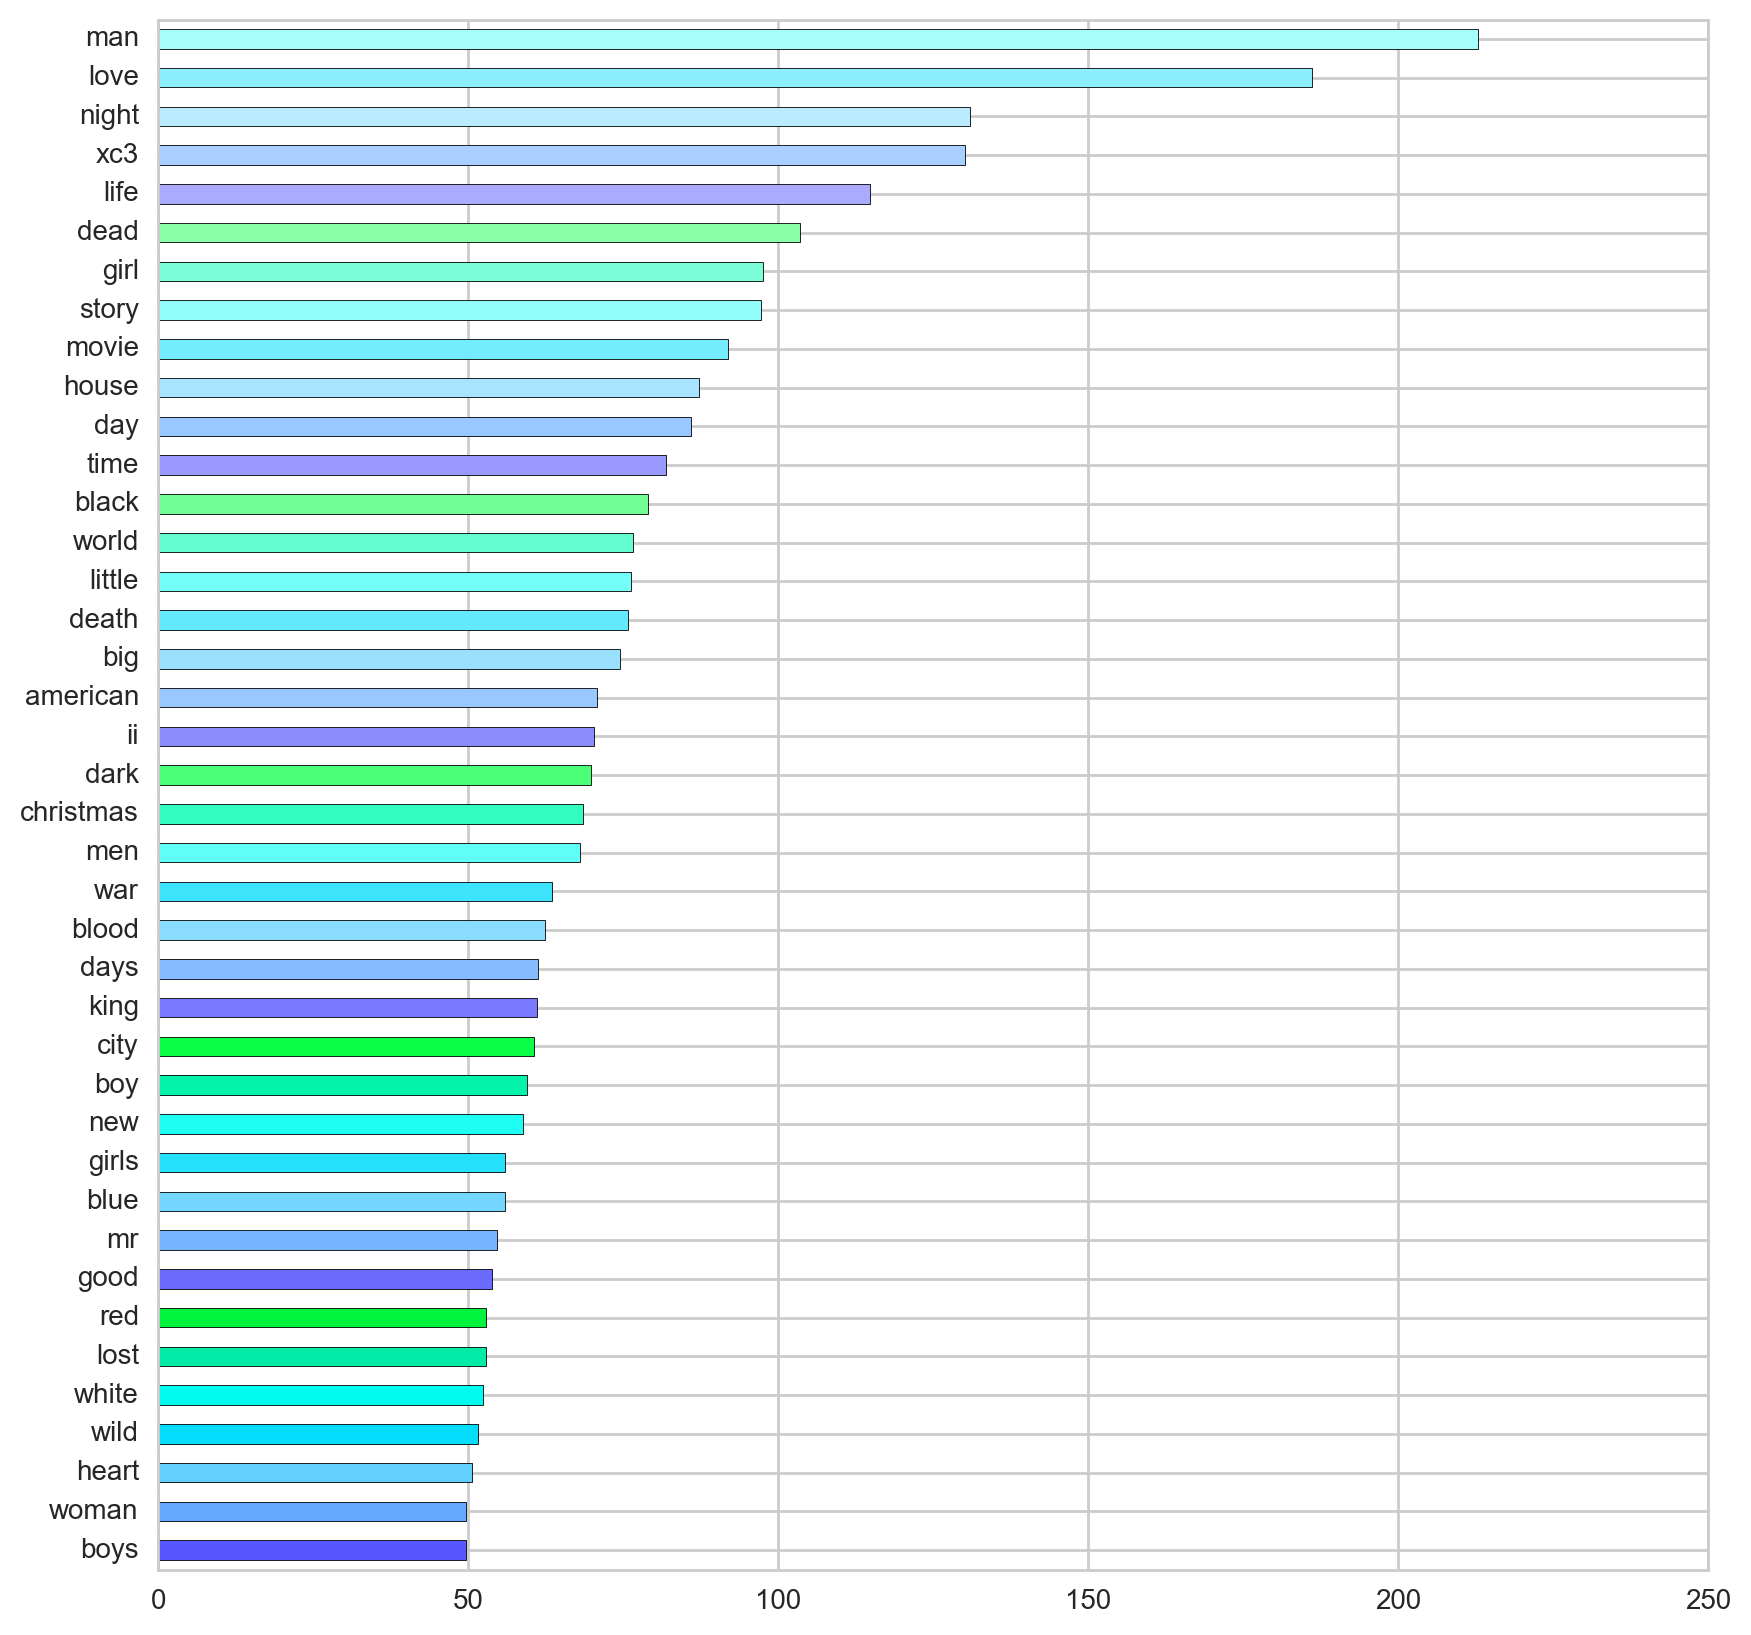

In [65]:
sorted_movies.sort_values().tail(40).plot(kind='barh', figsize=(10,10), color=colors_40)

In [66]:
comedy_df = movies_tfidf[movies_tfidf['COMEDY'] == 1]
drama_df = movies_tfidf[movies_tfidf['DRAMA'] == 1]
thriller_df = movies_tfidf[movies_tfidf['THRILLER'] == 1]
documentary_df = movies_tfidf[movies_tfidf['DOCUMENTARY'] == 1]
romance_df = movies_tfidf[movies_tfidf['ROMANCE'] == 1]
horror_df = movies_tfidf[movies_tfidf['HORROR'] == 1]
western_df = movies_tfidf[movies_tfidf['WESTERN'] == 1]

In [70]:
colors_romance = ["#FA8072",
"#E9967A",
"#F08080",
"#CD5C5C",
"#DC143C",
"#B22222",
"#FF0000",
"#8B0000",
"#800000",
"#FF6347",
"#FF4500",
"#DB7093", "#FFB6C1",
"#FF69B4",
"#FF1493",
"#DB7093",
"#C71585"]

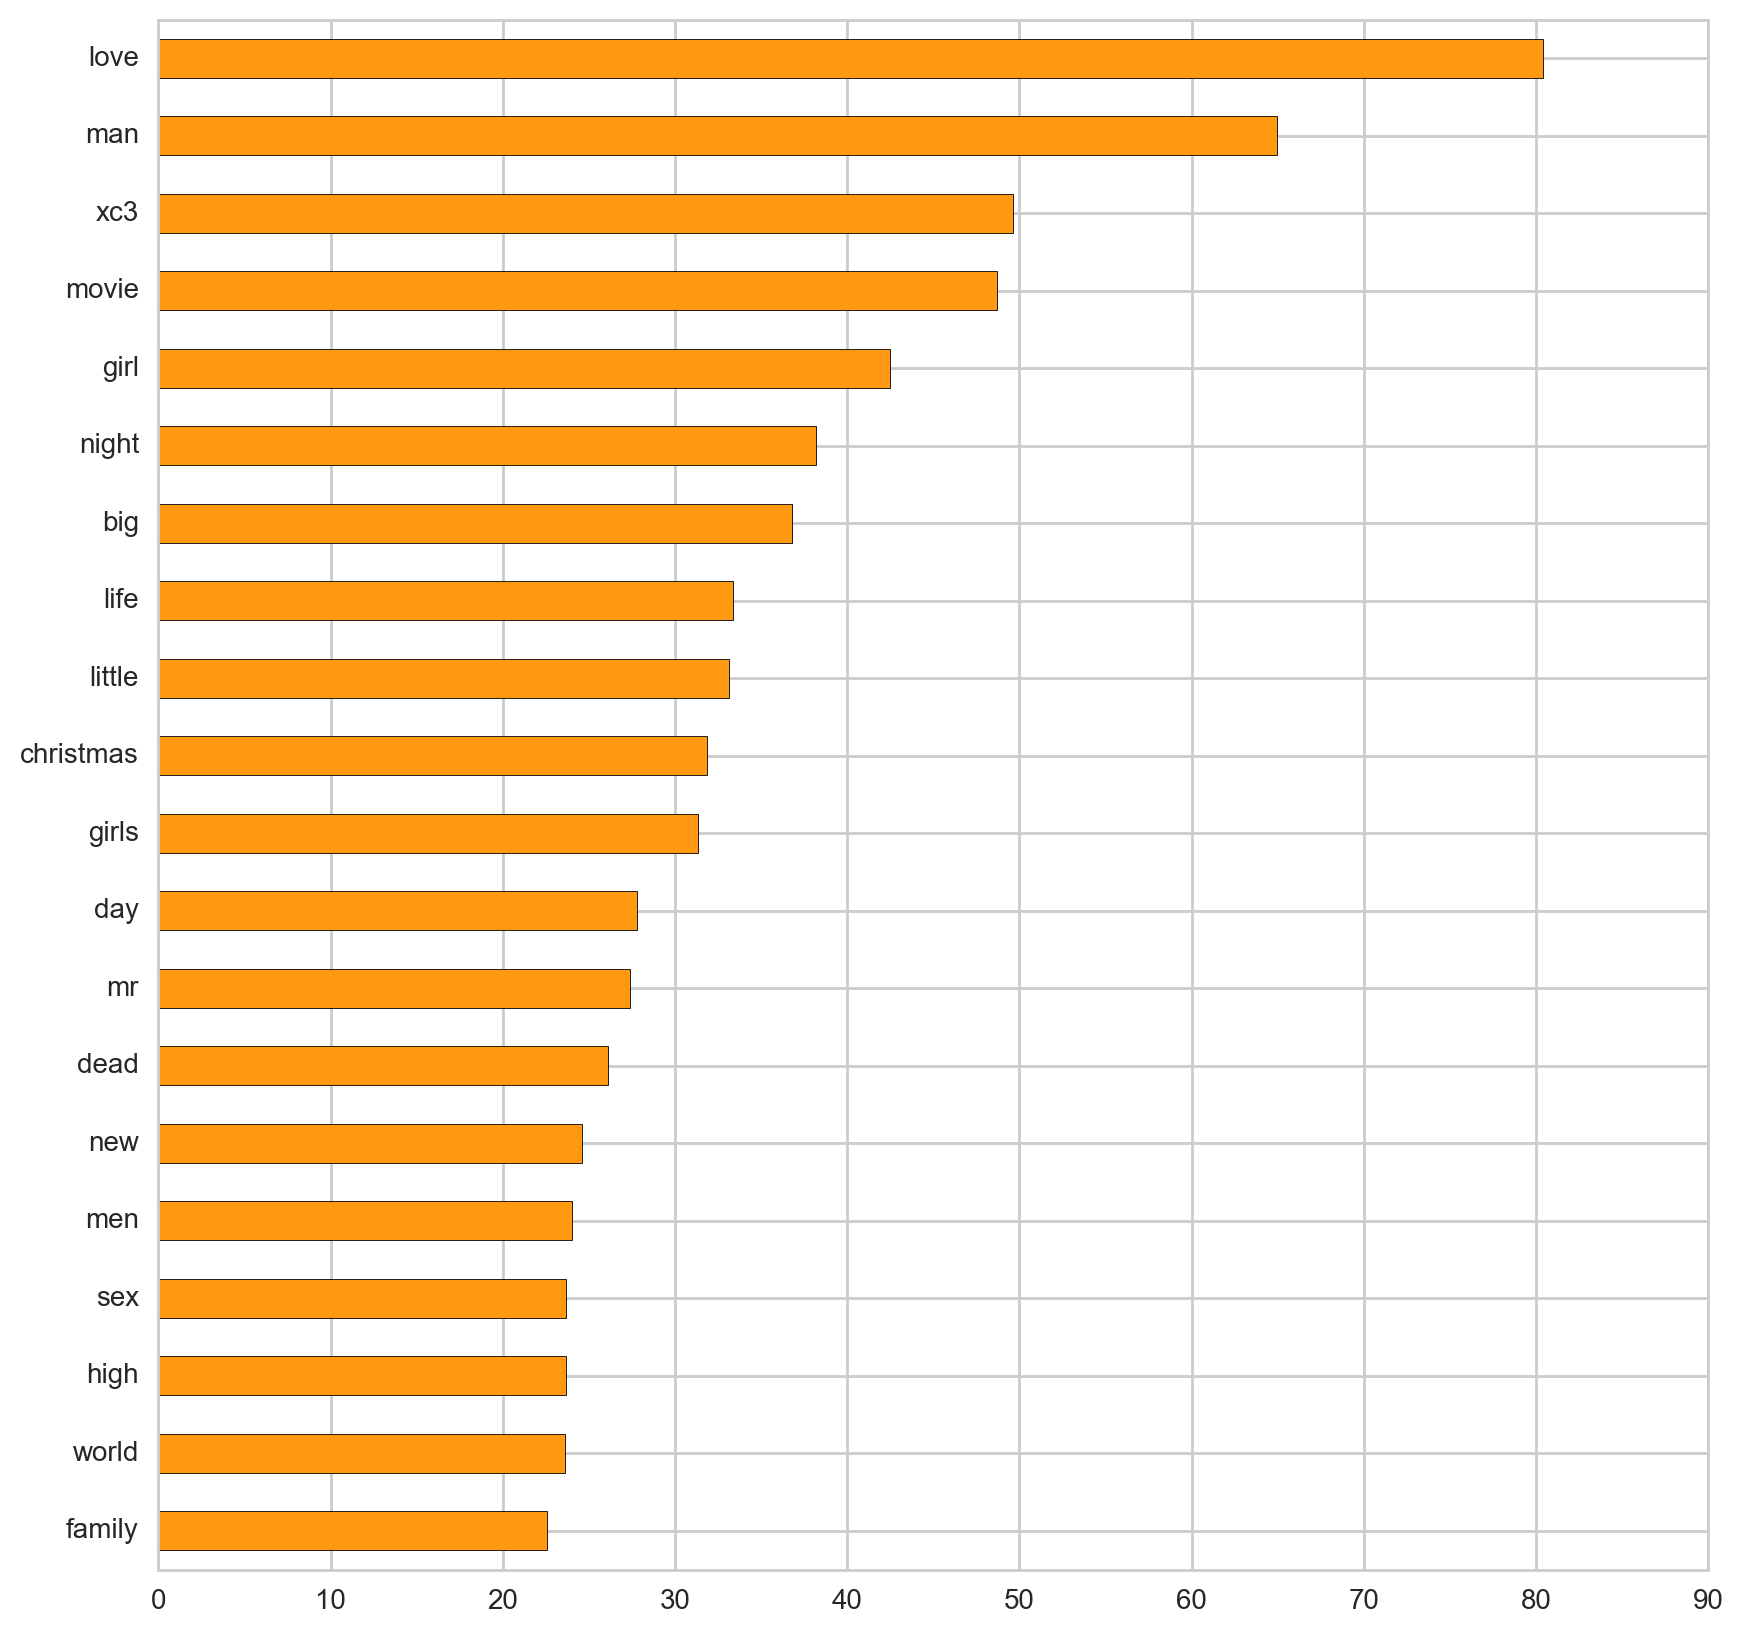

In [72]:
sorted_comedy = comedy_df.iloc[:,16:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_comedy.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#FF9912")

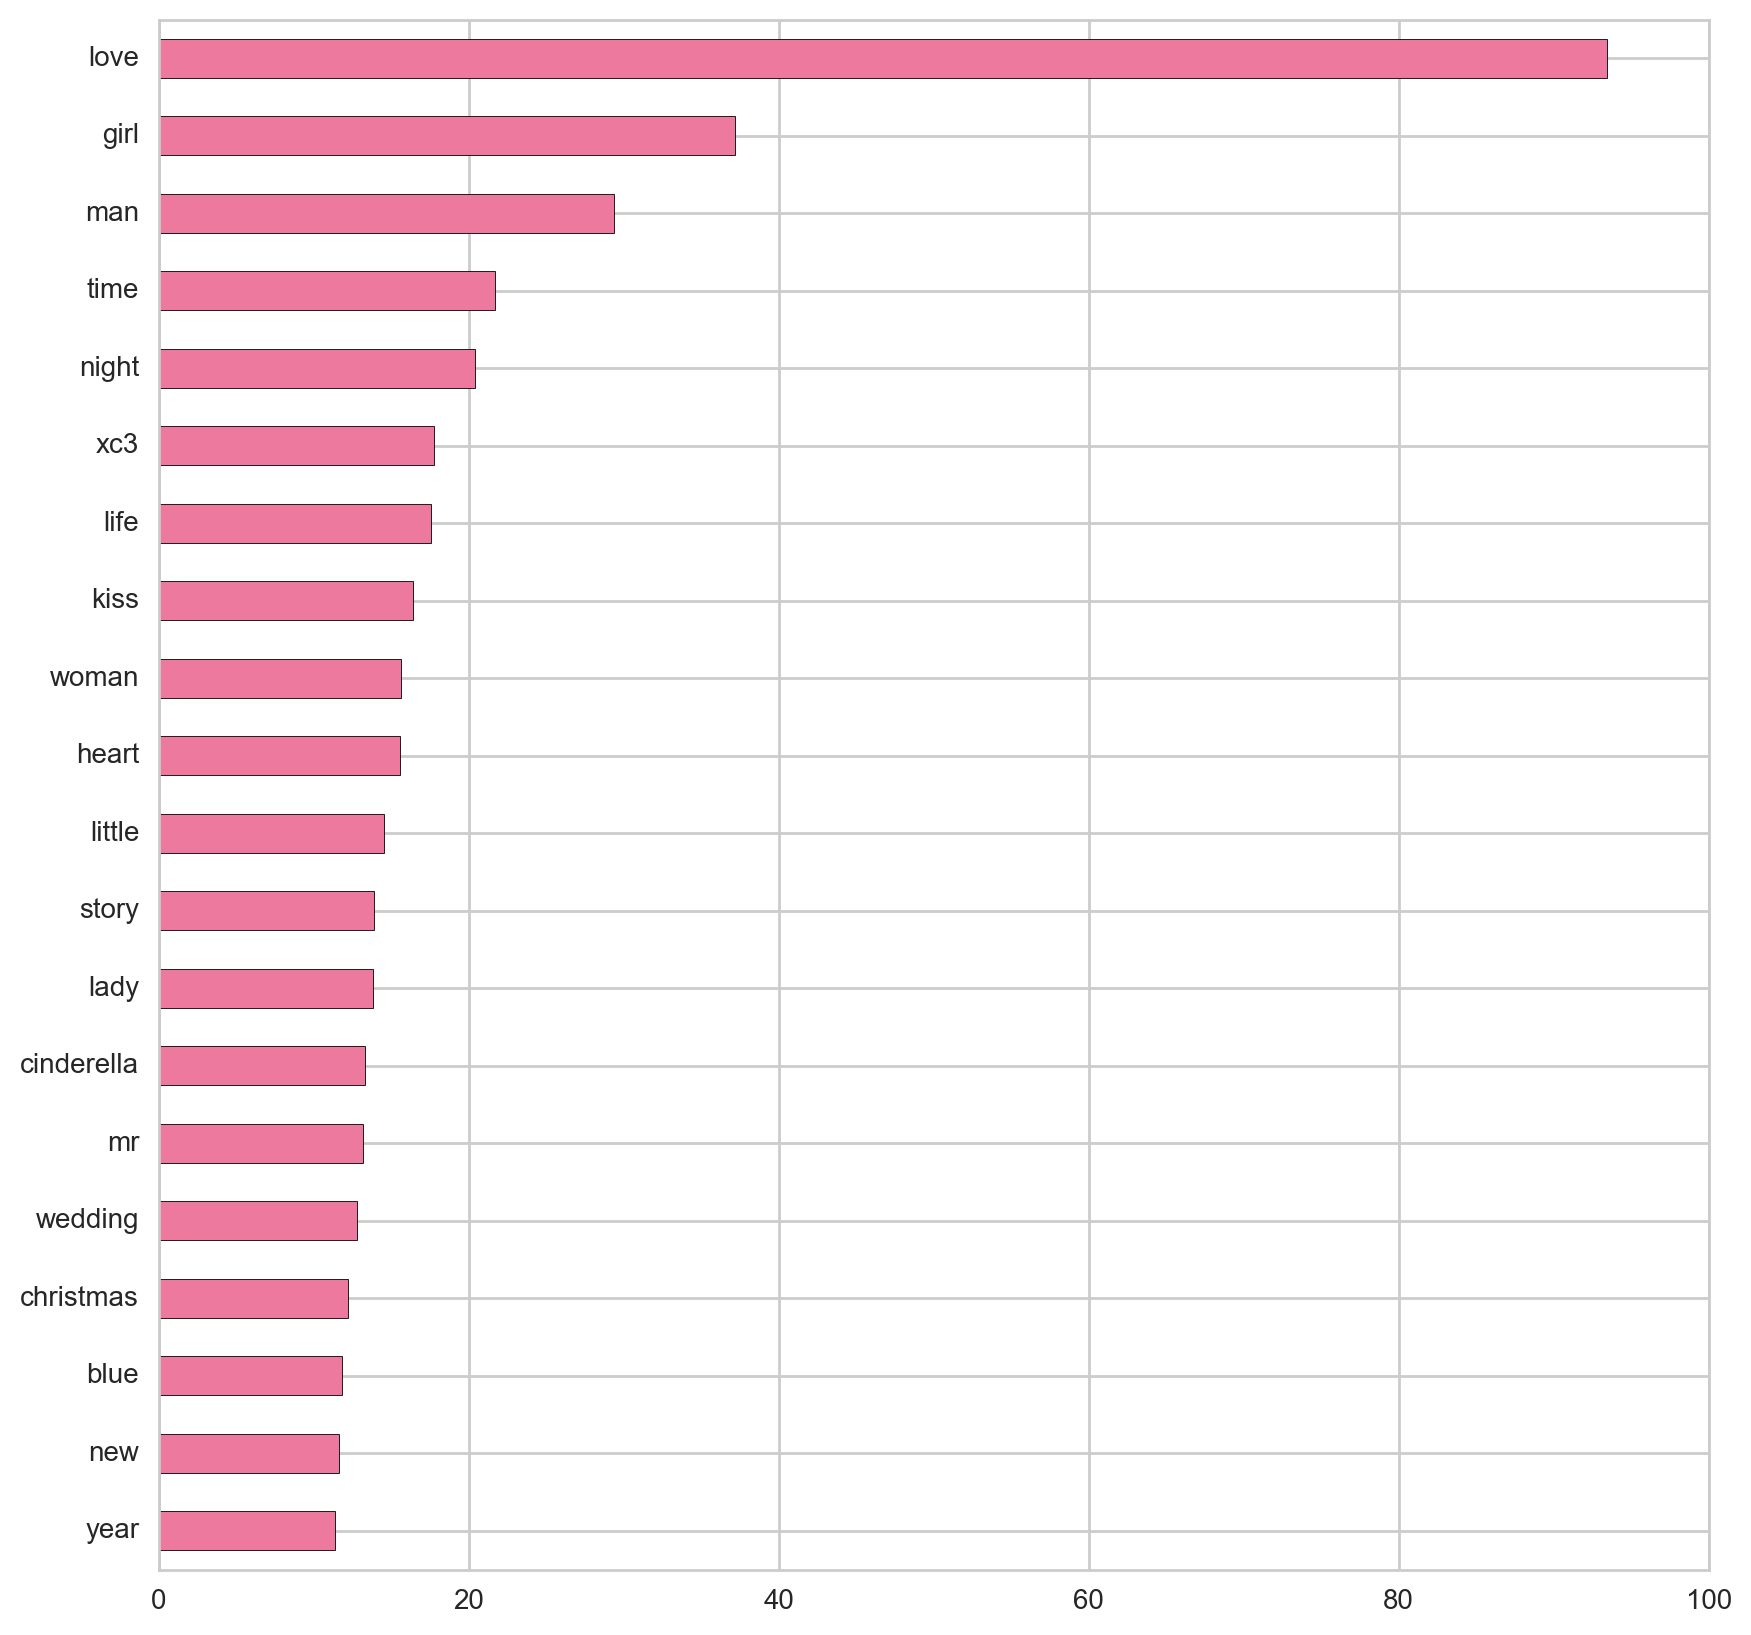

In [73]:
sorted_romance = romance_df.iloc[:,16:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_romance.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#EE799F")

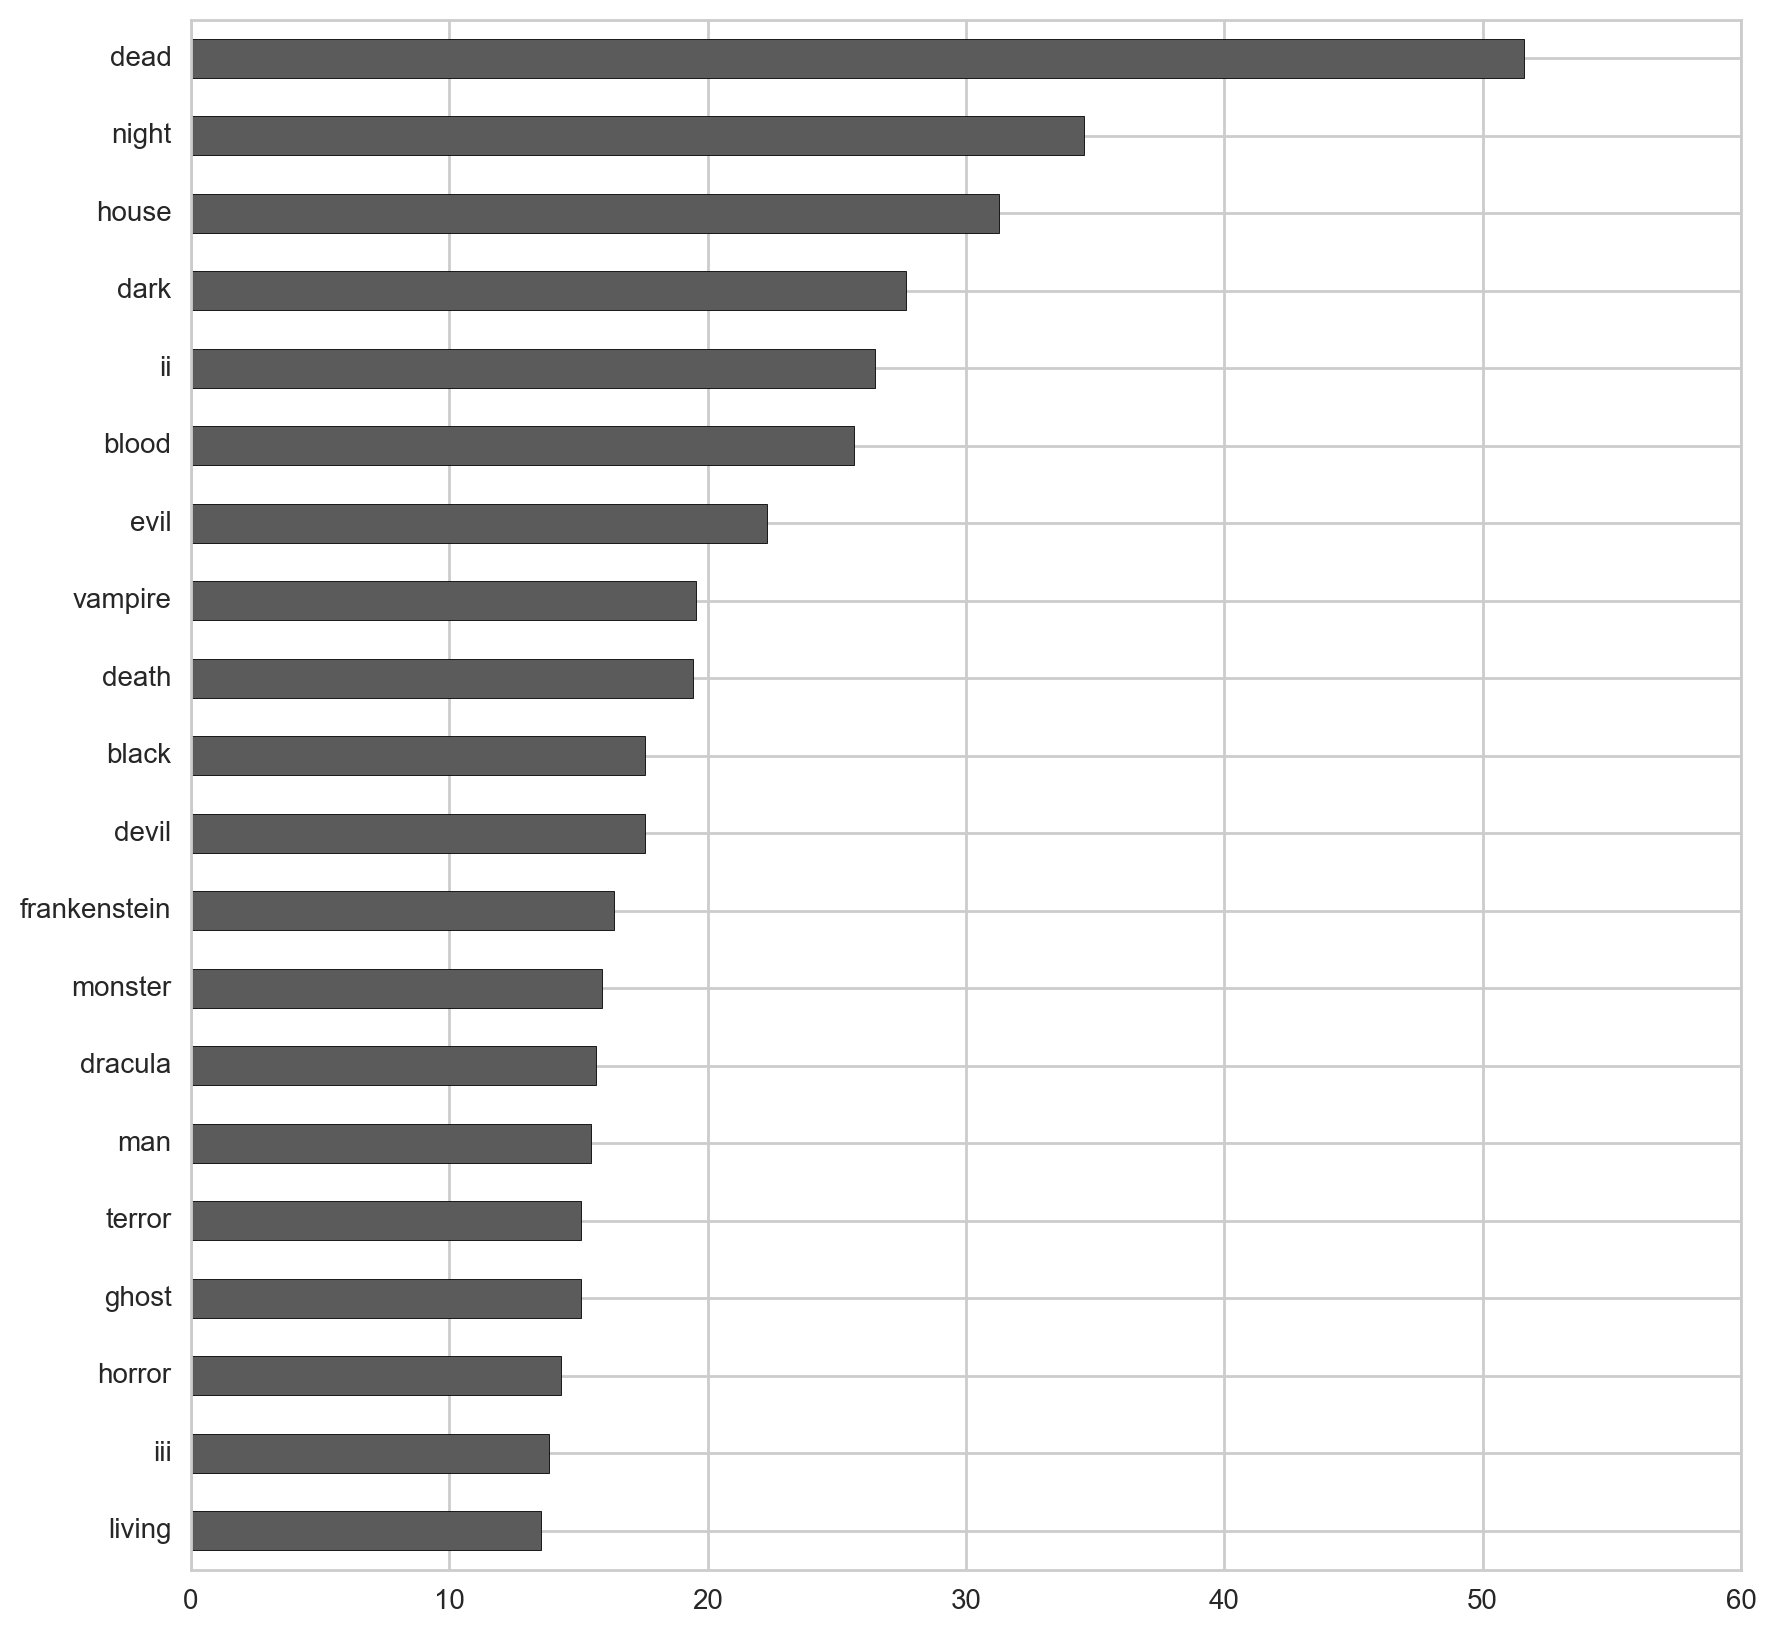

In [74]:
sorted_horror = horror_df.iloc[:,16:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_horror.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#5B5B5B")

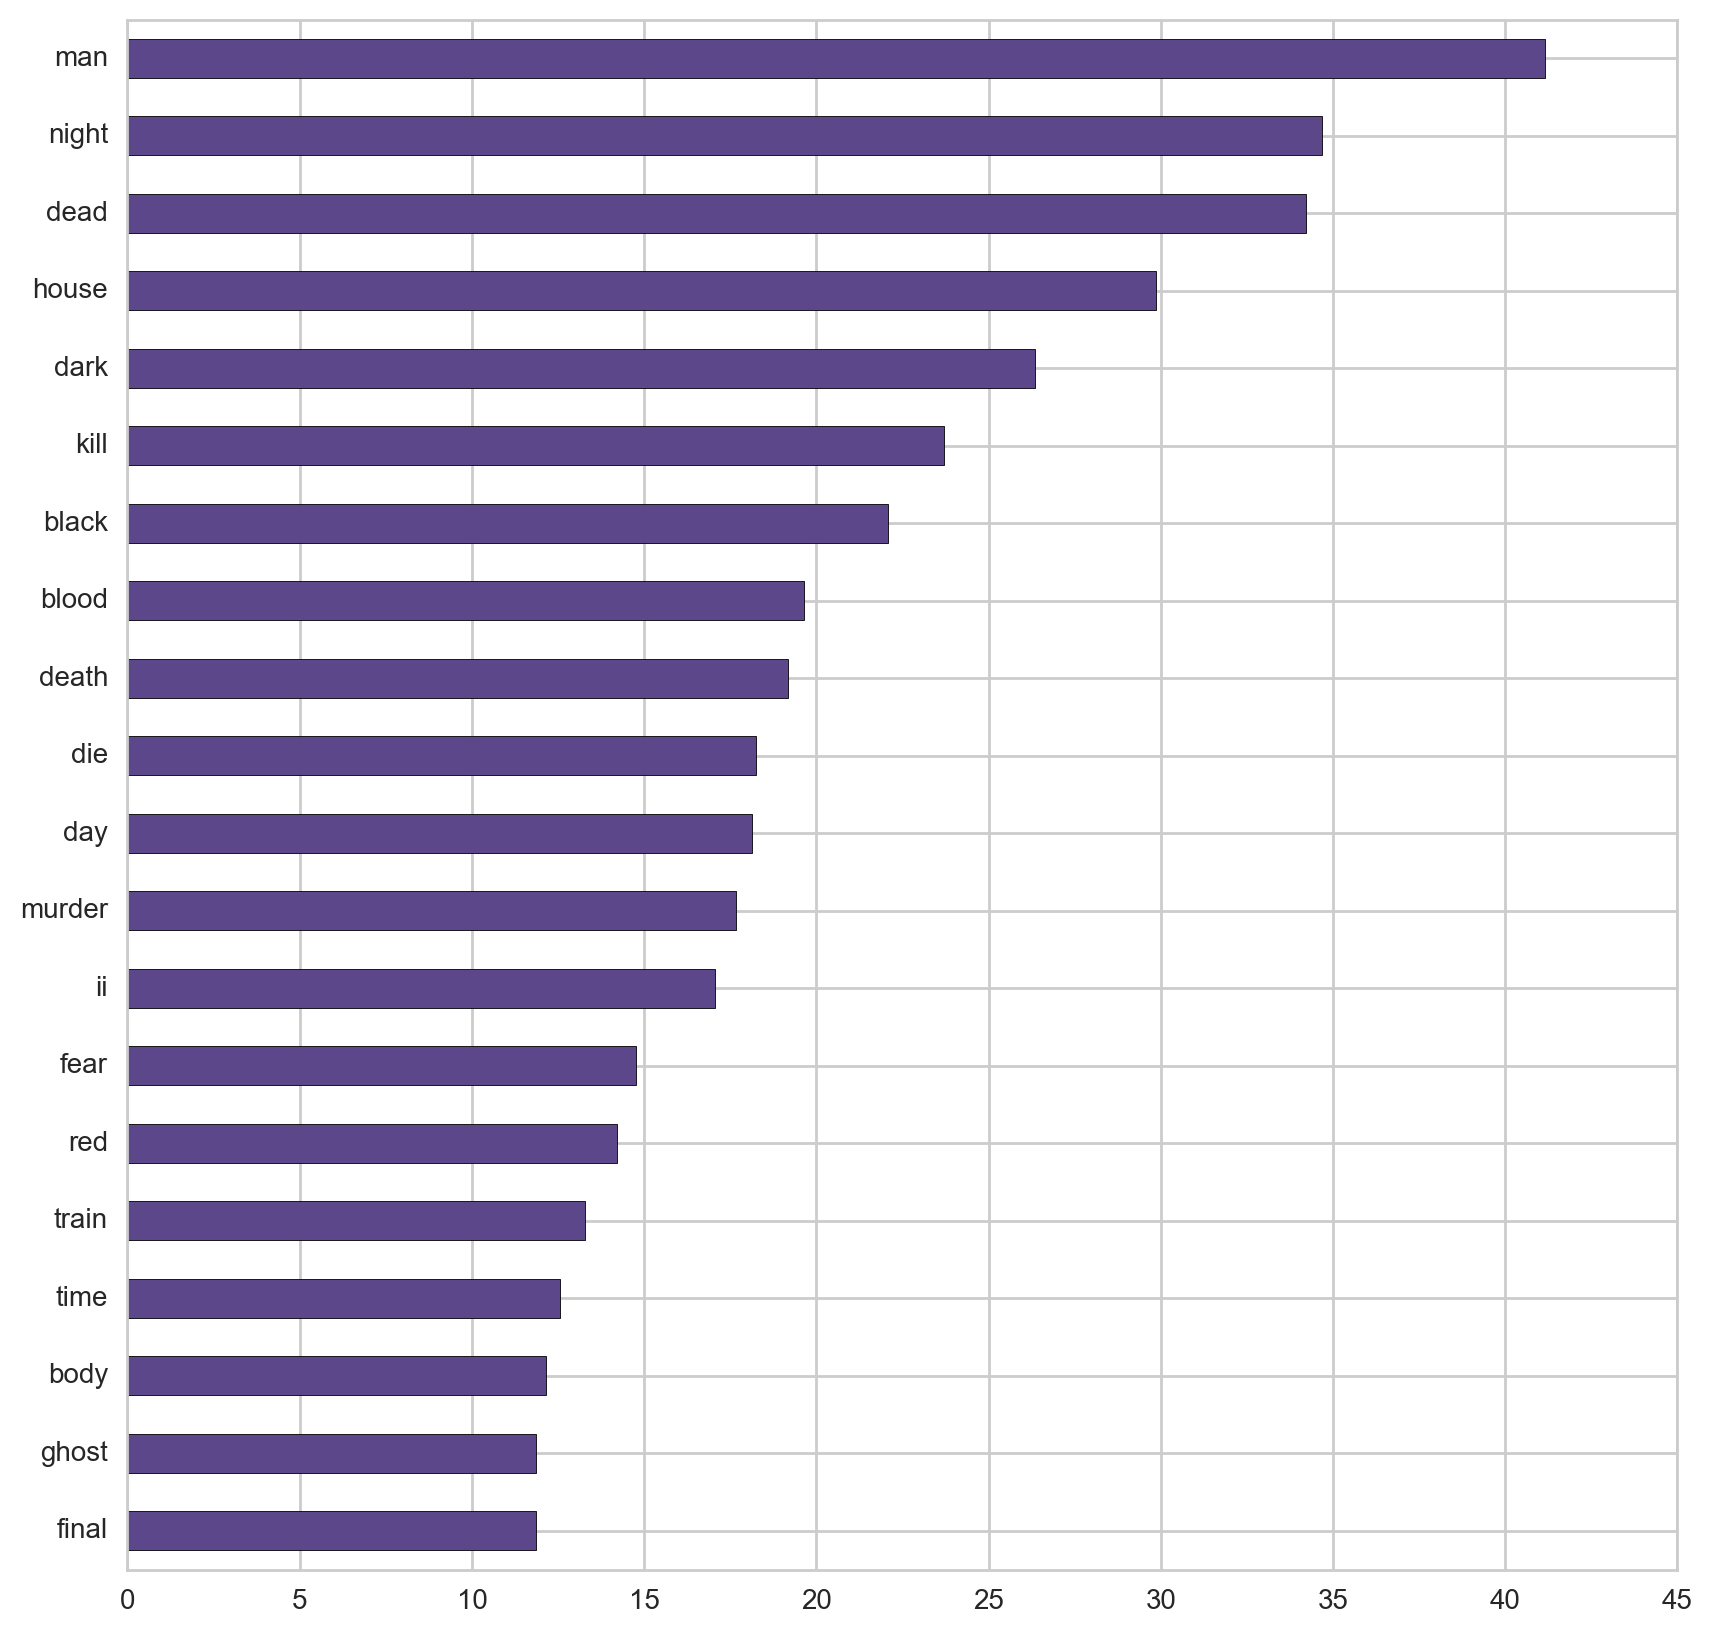

In [75]:
sorted_thriller = thriller_df.iloc[:,16:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_thriller.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#5D478B")

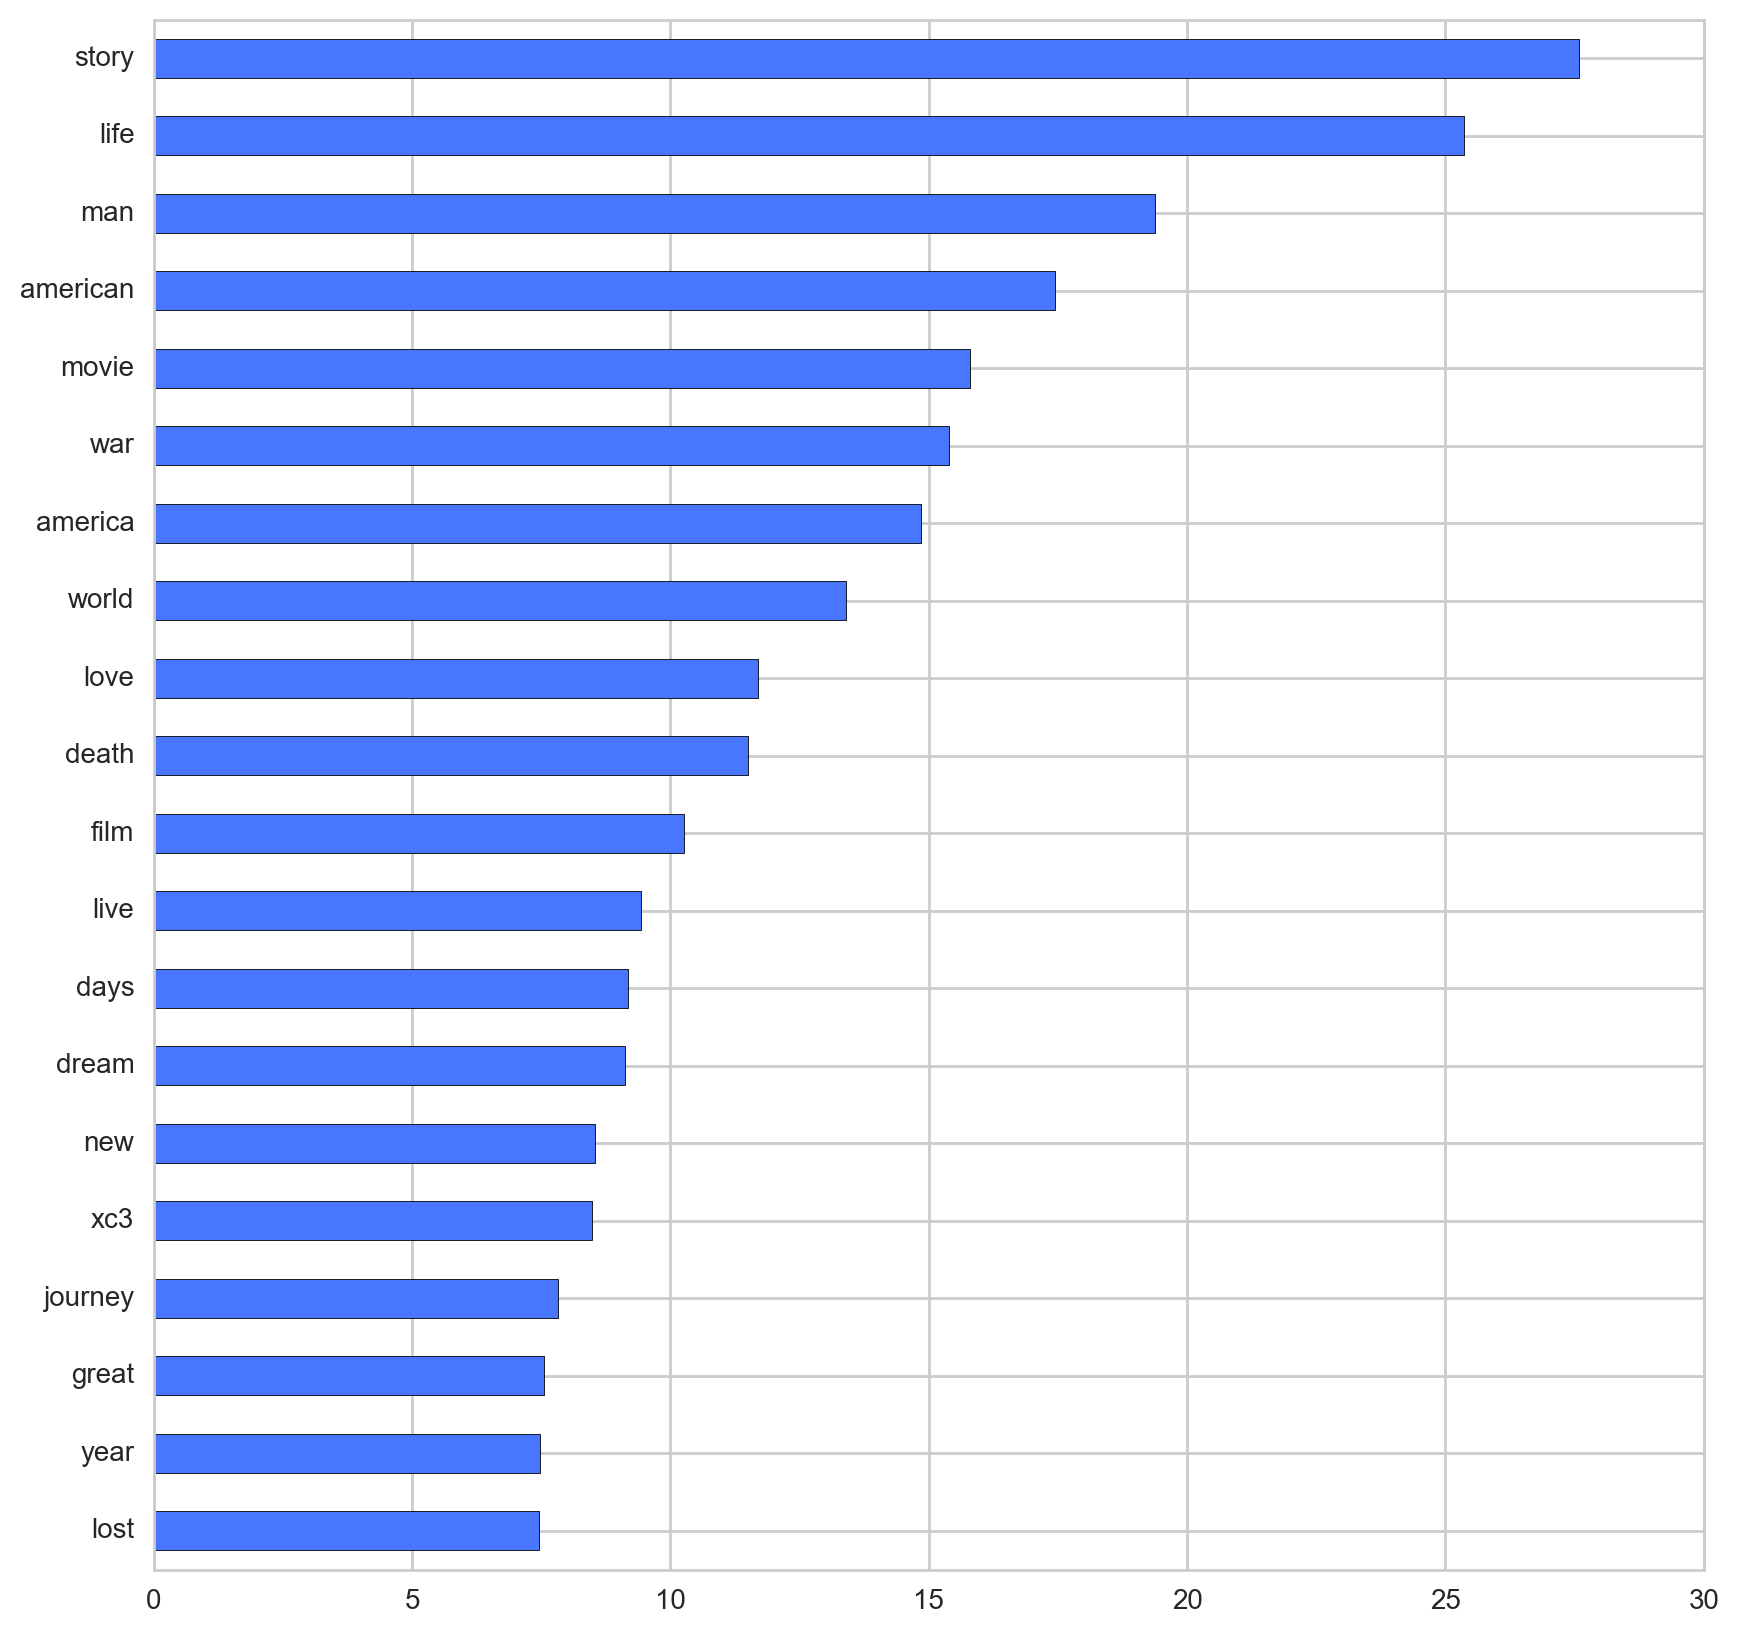

In [76]:
sorted_documentary = documentary_df.iloc[:,16:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_documentary.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#4876FF")

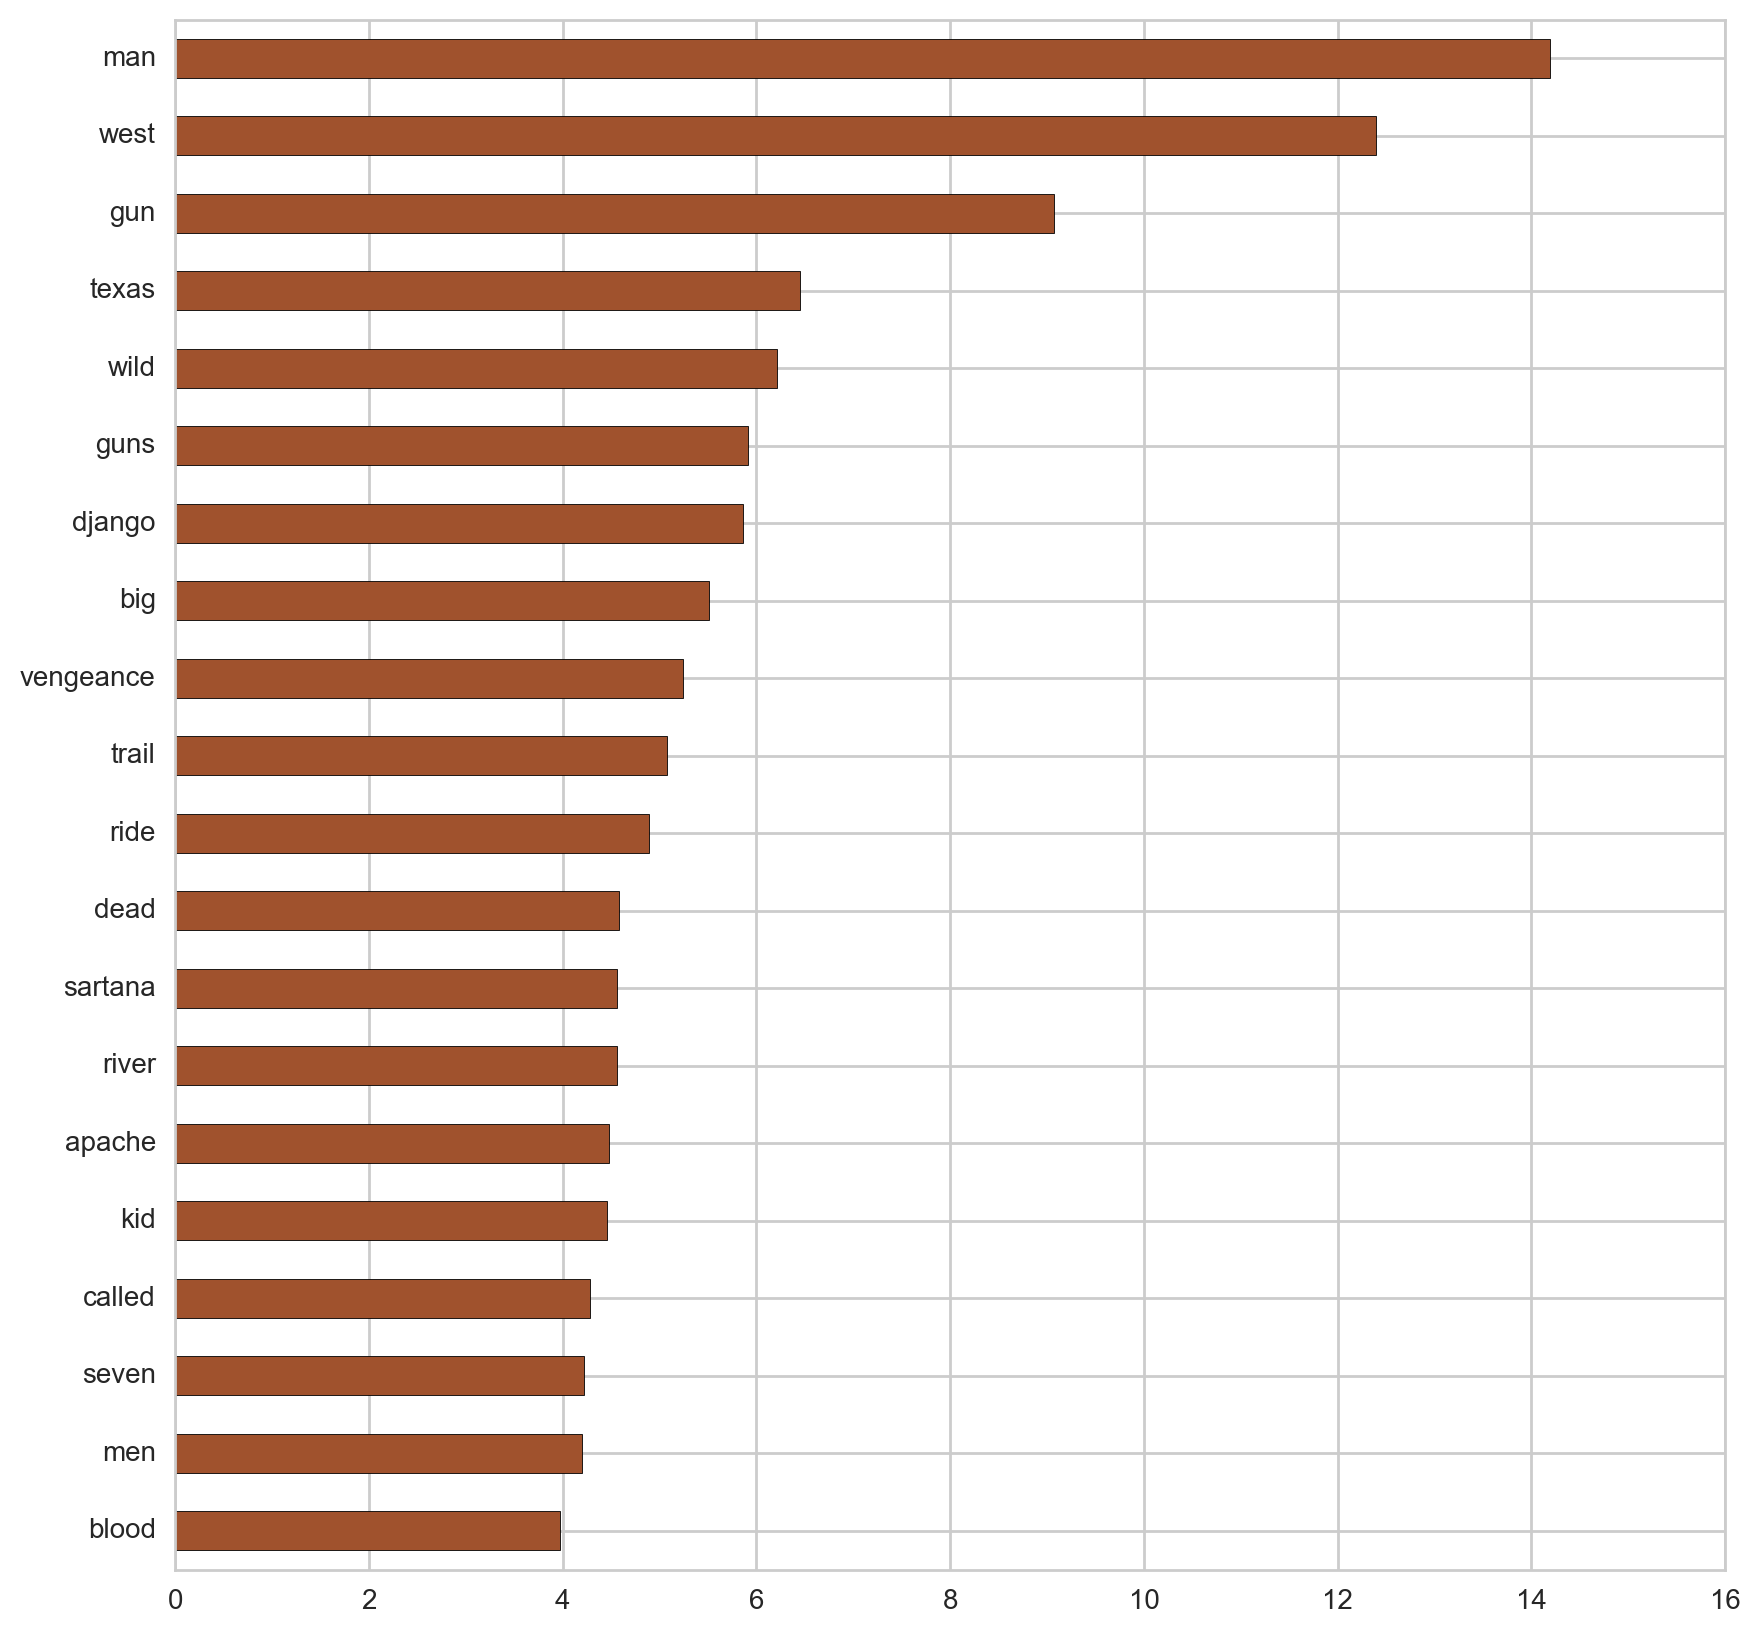

In [77]:
sorted_western = western_df.iloc[:,16:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_western.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#A0522D")

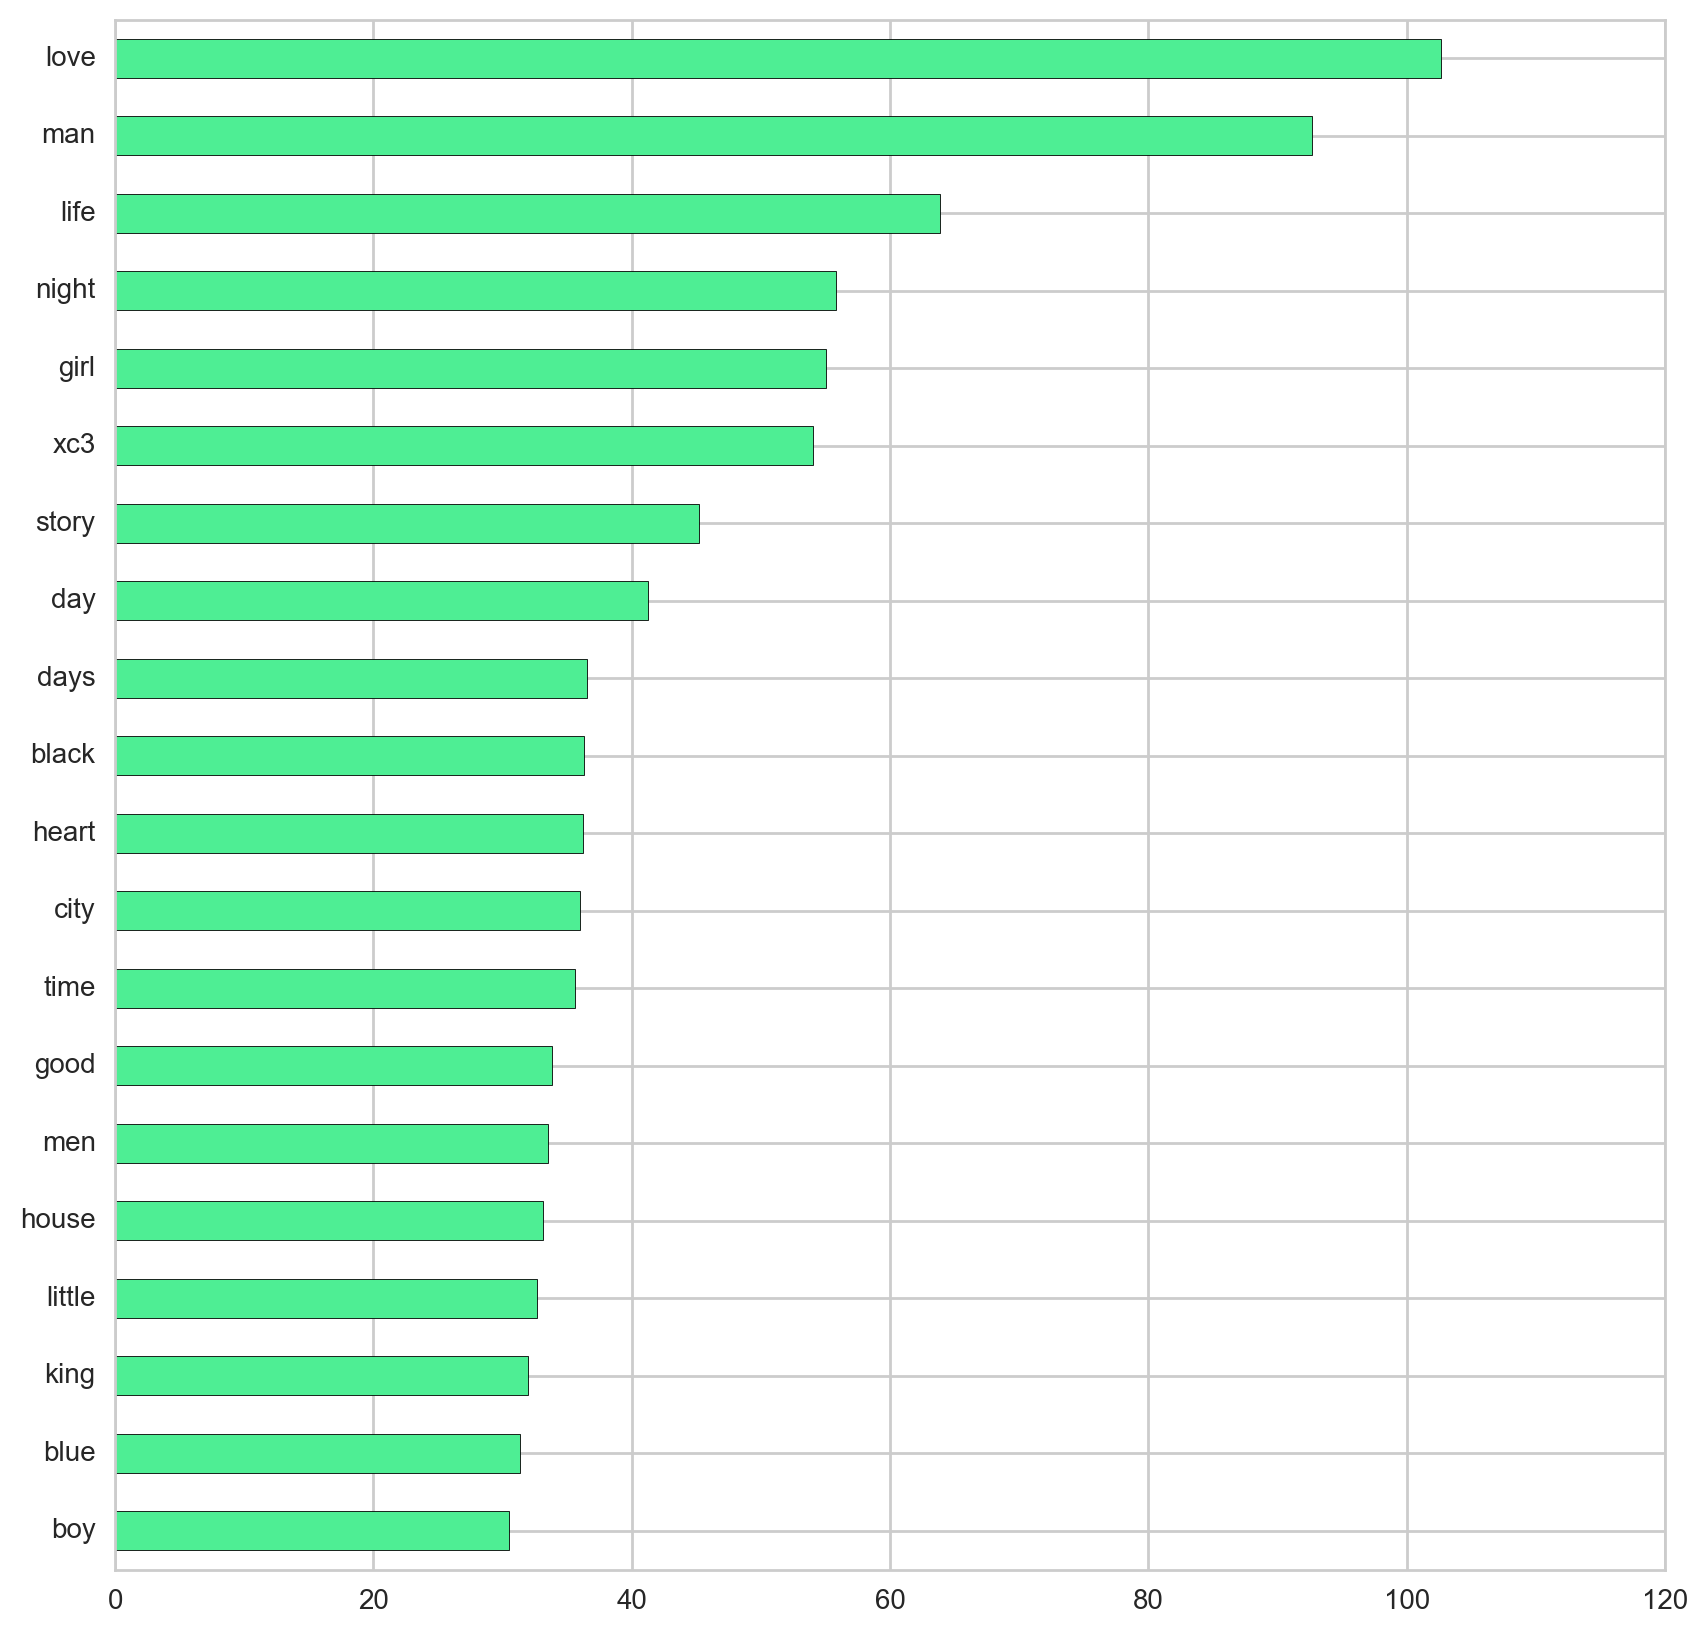

In [78]:
sorted_drama = drama_df.iloc[:,16:].sum(axis=0, skipna=True, level=None, numeric_only=None)
sorted_drama.sort_values().tail(20).plot(kind='barh', figsize=(10,10), color="#4EEE94")

## Multi-class classification with SVM:

#### First try with horror movies:

In [64]:
X = movies_tfidf.iloc[:, 15: -1].values
y = movies_tfidf['HORROR']
y = np.ravel(y)

In [65]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X, y)  


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').